In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
# Import Data
crime_df = pd.read_csv('data/grouped.csv')
crime_df = crime_df.drop(crime_df.columns[0], axis=1)
print(crime_df.head())
train = crime_df[0:5990]
test = crime_df[5990:]
print(train.shape)
print(test.shape)

                  Date  Count
0  2018-01-01 00:00:00    194
1  2018-01-01 01:00:00     47
2  2018-01-01 02:00:00     42
3  2018-01-01 03:00:00     34
4  2018-01-01 04:00:00     17
(5990, 2)
(1498, 2)


In [3]:
# Create Indexes

train = train.set_index(pd.DatetimeIndex(train['Date']))
test = test.set_index(pd.DatetimeIndex(test['Date']))

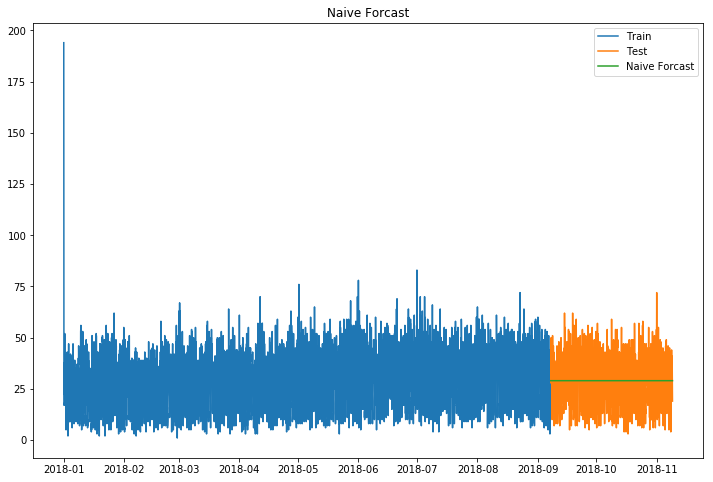

12.071687296269118


In [4]:
# Naive
dd = np.asarray(train.Count)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd) - 1]

plt.figure(figsize=(12, 8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index, test['Count'], label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forcast')
plt.legend(loc='best')
plt.title('Naive Forcast')
plt.show()

naive_rms = sqrt(mean_squared_error(test.Count, y_hat.naive))
print(naive_rms)

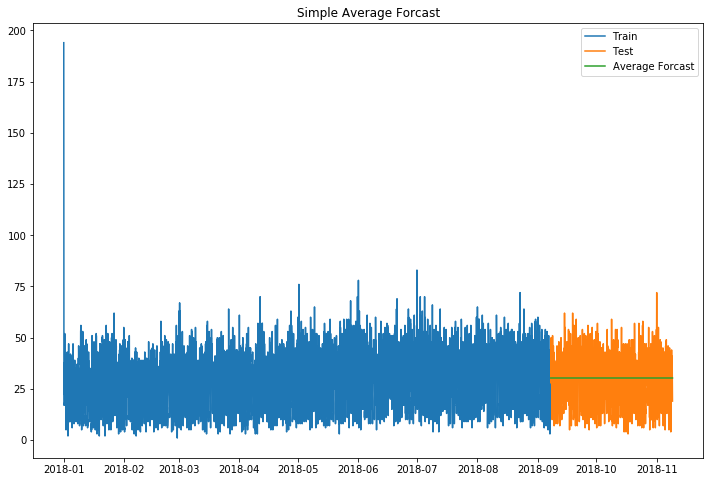

12.043506481797545


In [5]:
# Simple Average

y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()

plt.figure(figsize=(12, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forcast')
plt.legend(loc='best')
plt.title('Simple Average Forcast')
plt.show()

average_rms = sqrt(mean_squared_error(test.Count, y_hat_avg.avg_forecast))
print(average_rms)

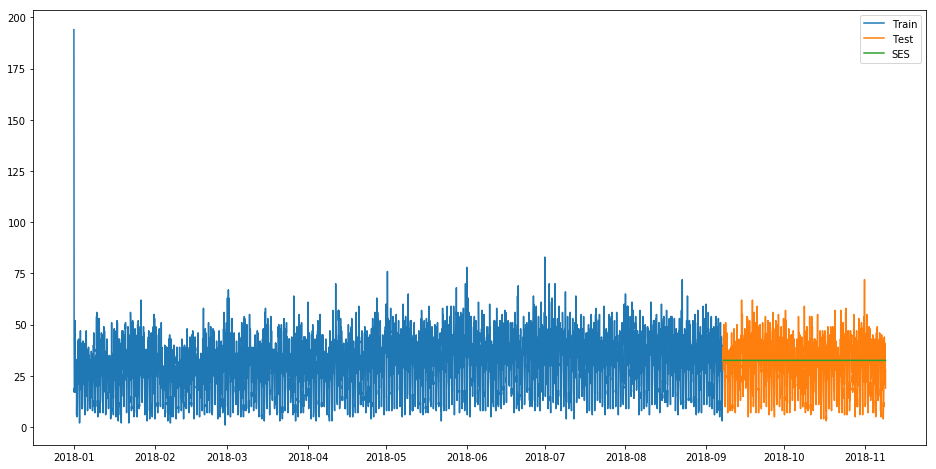

12.32659160324995


In [6]:
# Simple Exponential Soothing

y_hat_avg_ses = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6)
y_hat_avg_ses['SES'] = fit2.forecast(len(test))

plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg_ses['SES'], label='SES')
plt.legend(loc='best')
plt.show()

ses_rms = sqrt(mean_squared_error(test.Count, y_hat_avg_ses.SES))
print(ses_rms)
